# Maximizing Risk-Free Bets on Online Sportsbooks

#### By Ethan Orlowsky

## Introduction

Sportsbook occasionally offer promotions that offer users risk-free bets. A risk-free bet is one that pays out normally if it wins, but rewards you with a free bet equal to the size of your losing bet in the case you lose. 

A free bet is one that rewards you with the profit of a bet, but not the principal. Implied by the name, if you lose a free bet, you don't actually lose any money. 

While there is a well-defined way to maximize the rewards for the free bet you receive ([Oddsjam](https://oddsjam.com/betting-calculators/free-bet-conversion)), I was unable to find resources on how to maximize risk-free bets. I will explore one strategy in this notebook that relies on two sportsbook offering risk-free bets, and using them in conjunction to guarantee a profit.

This is how I made \$718.13 without risking a single dollar

## Setup

For this opportunity, we will assume there are two sportsbooks
1. Sportsbook A has a risk-free bet up to \$1000 
2. Sportsbook B has a risk-free bet up to \$1500

I chose this setup because at the time of this project, BetMGM (Sportsbook A) and Caesars (Sportsbook B) were offering these promotions.

## Maximizing the Free Bet

### Setup

To maximize the risk-free bet, we will work backwards and first solve for how to maximize the free bet. To make the notion of a free bet more concrete, here is an example of how a free bet pays off.

Ex:
- Suppose we have a \$1000 free bet
- Assume we place our \$1000 free bet on a bet with +150 odds
    - If we win, we win \$1500. A traditional bet would have rewarded us a total of \$2500, which includes the bet principal.
    - If we lose, our account balance stays the same

More generally, we want to know how to maximize a free bet of \$f. To maximize our minimum winnings, the free bet should be used on the underdog, with a hedge on the other side of the bet using a different sportsbook.

### Bettor Choices

A bettor must decide at what odds to place their bet (+a and -b) and how big their hedge (\$H) should be. Note that since we can't lose money with free bets, the maximum free bet amount should be wagered.

### Calculations

- If the free bet wins, the bettor nets
    $$\text{profit} = \frac{af}{100} - H$$

- If the hedge bet wins, the bettor nets
    $$\text{profit} = \frac{100H}{b}$$

To maximize our minimum reward, we will set the profits in both scenarios equal. Solving for H yields
    $$H = \frac{abf}{100(100+b)}$$

This guarantees a profit of
    $$\text{profit} = \frac{af}{100 + b}$$

### Calculating Payoffs for a given set of odds

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def hedge(a, b, f):
    return a * b * f / (100 * (100 + b))

def free_bet_profit(a, b, f):
    return a * f / (100 + b)

You can change a, b, and f below to see how these factors affect your guaranteed profit

In [3]:
a, b, f = 150, 170, 1500
print(f"Assume a bettor has a ${f:,} free bet, and takes both sides of a +{a} and -{b} bet")

h = hedge(a, b, f)
p = free_bet_profit(a, b, f)

print(f"The optimal hedge size is ${h:,.2f} and guarantees ${p:,.2f} in profit")

Assume a bettor has a $1,500 free bet, and takes both sides of a +150 and -170 bet
The optimal hedge size is $1,416.67 and guarantees $833.33 in profit


### How to Choose Odds

Since odds are always changing, its not a guarantee that the most profitable odds you want to bet will be available. This next visualization will help you decide which odds you should pick to maximize your profit given the opportunities available on the sportsbook you're using.

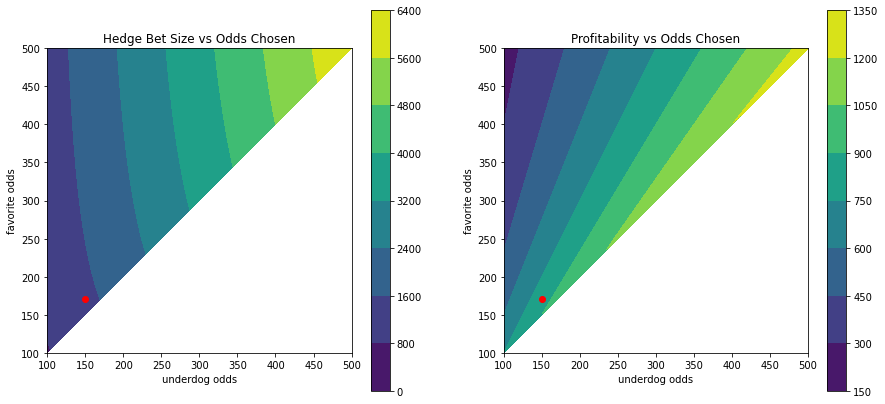

In [4]:
# free bet size
f = 1500

odds_range = np.linspace(100.0, 500.0, 100)
  
[X, Y] = np.meshgrid(odds_range, odds_range)

# only show non-arbitrage betting opportunities, since arbitrages are very rare
X, Y = np.tril(X).clip(100), np.tril(Y).clip(100)
  
fig, [ax1, ax2] = plt.subplots(1, 2)

Z1 = hedge(X, Y, f)
h1 = ax1.contourf(X, Y, Z1)
  
ax1.set_title('Hedge Bet Size vs Odds Chosen')
ax1.set_xlabel('underdog odds')
ax1.set_ylabel('favorite odds')
fig.colorbar(h1, ax=ax1)
ax1.axis('square')
ax1.scatter(a, b, color='red')

Z2 = free_bet_profit(X, Y, f)
h2 = ax2.contourf(X, Y, Z2)
  
ax2.set_title('Profitability vs Odds Chosen')
ax2.set_xlabel('underdog odds')
ax2.set_ylabel('favorite odds')
fig.colorbar(h2, ax=ax2)
ax2.axis('square')
ax2.scatter(a, b, color='red')

fig.set_size_inches(15, 7)
plt.show()

### Chart Interpretation

For both charts, we only show the upper left triangle because anything in the lower right triangle represents an arbitrage opportunity. Arbitrage opportunities are rare, so they distract from the realm of potentially available bet pairs

- Left Chart
    - X-axis plots the underdog odds (+a), Y-axis plots the favorite odds (-b), color represents optimal hedge bet size
    - Lighter colors represent bigger hedge bets, so as the odds get longer on both sides, the bigger the hedge bet must be
- Right Chart
    - X-axis plots the underdog odds (+a), Y-axis plots the favorite odds (-b), color represents guaranteed profit
    - Lighter colors represent bigger profits, so as the odds get bigger/closer to fair value, the bigger the profit becomes

__Takeaways__
- As odds get longer, the hedge bet becomes prohibitively expensive (Upwards of \$5000)
- Bigger profits require bigger hedges

### Final Free Bet Recommendation

In general, you should aim to profit 60-70% of the free bet size. Achieving this goal could require large hedge bets, but guarantees you a larger profit.

## Maximizng the Risk-Free Bet

### Setup

Now that we know how much we can expect to receive from a free bet, we can calculate the optimal strategy for our risk-free bet. First, lets run through a quick example of the potential outcomes of a risk-free bet

Ex:
- Suppose we have a \$1000 risk-free bet
- Assume we place our \$1000 risk-free bet on a bet with +150 odds
    - If we win, we win \$2500. This is a net of \$1500 profit.
    - If we lose, we lose \$1000 and receive a \$1000 free bet

We want to maximize a risk-free bet of \$r. Again, we will want to use the risk-free bet should on the underdog, with a hedge on the other side of the bet using a different sportsbook.

### Bettor Choices

A bettor must decide what bet sizes to use ($b_1$ and $b_2$) and at what odds (+a and -b). To guarantee profit, we will take both sides of a bet using two risk-free bets on different sportsbooks, so we guarantee one of the bets will win. Since we _can_ lose money with free bets, it's not always the best idea to bet the risk-free bet limit.

### Calculations

- If the risk-free bet on Sportsbook A wins, the bettor nets
    $$\frac{ab_1}{100} + f(b_2) - b_2$$

- If the risk-free bet on Sportsbook B wins, the bettor nets
    $$\frac{100b_2}{b} + f(b_1) - b_1$$

__Note:__ $f(x)$ represents the profit we receive from a free bet of size \$x.

To maximize our minimum gain, we will set the two profits for each possible outcome equal to each other. This yields the formula

$$\frac{ab_1}{100} + f(b_2) - b_2 = \frac{100b_2}{b} + f(b_1) - b_1$$

If we assume that we can convert our free bet at a rate of $C$ so that $f(x) = Cx$, then we can solve for $b_1$

$$b_1 = \frac{100(100+b(1-C))}{b(a+100(1-C))}b_2$$

But since the risk-free bet limit is \$1000 for Sportsbook A (the book we're making the bet $b_1$ on), we must cap the bet. The formula for $b_1$ now becomes

$$b_1 = \min\left\{\frac{100(100+b(1-C))}{b(a+100(1-C))}b_2, ~ 1000\right\}$$

Choosing a $b_2$ that makes the optimal bet go over \$1000 is bad. That is because a part of our bet on Sportsbook B will go unhedged. Thus, we should always aim to get $b_1 = 1000$. Similarly, if the bet $b_2$ needed to make $b_1 = 1000$ is greater than \$1500, we will want to cap $b_2$ to be \$1500. In this case, $b_1$ will be less than \$1000.

Choosing bet sizes for $b_1$ and $b_2$ within the limits then yields a profit of

$$\text{profit} = \frac{ab_1}{100} + b_2(C-1)$$

Assuming that this overall strategy is profitable (which will turn out to be a good assumption), we see that it is strictly better to make $b_2$ as large as possible. If we instead solved in terms of $b_1$, we would come to this same conclusion. So at least one of $b_1$ and $b_2$ will be at the risk-free bet limit. Here are the accompanying calculations for if we choose $b_1$ instead

$$b_2 = \min\left\{\frac{b(a + 100(1-C))}{100(100 + b(1-C))}b_1, ~ 1500 \right\}$$

$$\text{profit} = \frac{100b_2}{b} + b_1(C-1)$$

### Calculating Payoffs for a given set of odds

When deciding whether to set your bet with Sportsbook A to \$1000, or \$1500 with Sportsbook B, you will choose the one such that the other bet is below the maximum risk-free bet threshold

In [5]:
# The optimal bet size for b1 when b2 is set to 1500
def b1(a, b, C):
    return 100 * (100 + b * (1 - C)) / (b * (a + 100 * (1 - C))) * 1500

# The optimal bet size for b2 when b1 is set to 1000
def b2(a, b, C):
    return b * (a + 100 * (1 - C)) / (100 * (100 + b * (1 - C))) * 1000

def p1(a, b, C, b1, b2):
    return a * b1 / 100 + b2 * (C - 1)

def p2(a, b, C, b1, b2):
    return 100 * b2 / b + b1 * (C - 1)

def profit(a, b, C, r1, r2):
    bet1 = b1(a, b, C)
    bet2 = b2(a, b, C)

    profit1 = p1(a, b, C, r1, bet2)
    profit2 = p2(a, b, C, bet1, r2)

    return np.minimum(profit1, profit2)

We will set the free bet conversion rate to 65%. This is right in the middle of the suggested conversion range goal of 60%-70%. 

In [6]:
a, b, C, r1, r2 = 150, 170, 0.65, 1000, 1500

print(f"Assume a bettor has 2 risk-free bets of ${r1:,} and ${r2:,}, and takes both sides of a +{a} and -{b} bet")

bet1 = b1(a, b, C)
bet2 = b2(a, b, C)

bets = (bet1, 1500) if bet1 <= 1000 else (1000, bet2)
prof = profit(a, b, C, r1, r2)

print(f"The optimal bet sizings are ${bets[0]:,.2f} and ${bets[1]:,.2f} and guarantees ${prof:,.2f} in profit")

Assume a bettor has 2 risk-free bets of $1,000 and $1,500, and takes both sides of a +150 and -170 bet
The optimal bet sizings are $760.73 and $1,500.00 and guarantees $616.10 in profit


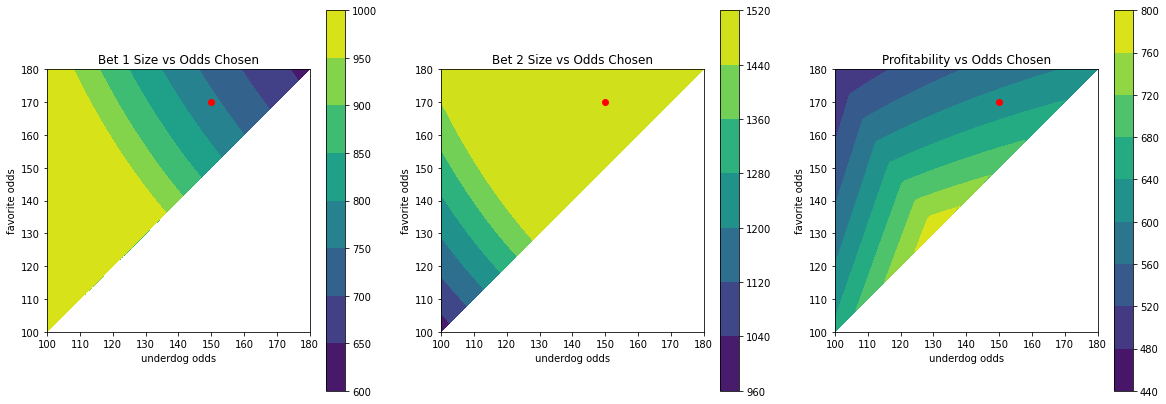

In [7]:
odds_range = np.linspace(100.0, 180.0, 100)
  
[X, Y] = np.meshgrid(odds_range, odds_range)

# only show non-arbitrage betting opportunities, since arbitrages are very rare
X, Y = np.tril(X).clip(100), np.tril(Y).clip(100)
  
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

# option where we set bet 2 to $1500
bet1 = b1(X, Y, C)
# option where we set bet 1 to $1000
bet2 = b2(X, Y, C)

profits = profit(X, Y, C, r1, r2)

h1 = ax1.contourf(X, Y, np.clip(bet1, None, r1))

ax1.set_title('Bet 1 Size vs Odds Chosen')
ax1.set_xlabel('underdog odds')
ax1.set_ylabel('favorite odds')
fig.colorbar(h1, ax=ax1)
ax1.axis('square')
ax1.scatter(a, b, color='red')

h2 = ax2.contourf(X, Y, np.clip(bet2, None, r2))

ax2.set_title('Bet 2 Size vs Odds Chosen')
ax2.set_xlabel('underdog odds')
ax2.set_ylabel('favorite odds')
fig.colorbar(h2, ax=ax2)
ax2.axis('square')
ax2.scatter(a, b, color='red')

h3 = ax3.contourf(X, Y, profits)

ax3.set_title('Profitability vs Odds Chosen')
ax3.set_xlabel('underdog odds')
ax3.set_ylabel('favorite odds')
fig.colorbar(h3, ax=ax3)
ax3.axis('square')
ax3.scatter(a, b, color='red')

fig.set_size_inches(20, 7)
plt.show()

0## Chart Interpretation

For all three charts, we only show the upper left triangle because anything in the lower right triangle represents an arbitrage opportunity. Arbitrage opportunities are rare, so they distract from the realm of potentially available bet pairs

- Left Chart
    - X-axis plots the underdog odds (+a), Y-axis plots the favorite odds (-b), color represents optimal $b_1$ bet size when $b_2 = 1500$
    - Lighter colors represent bigger bets on Sportsbook A
    - The solid mustard color block represents the bet pairs where you should max out $b_1$ to be \$1000
- Middle Chart
    - X-axis plots the underdog odds (+a), Y-axis plots the favorite odds (-b), color represents optimal $b_2$ bet size when $b_1 = 1000$
    - Lighter colors represent bigger bets on Sportsbook B
    - The solid mustard color block represents the bet pairs where you should max out $b_2$ to be \$1500
- Right Chart
    - X-axis plots the underdog odds (+a), Y-axis plots the favorite odds (-b), color represents guaranteed profit
    - Lighter colors represent bigger profits, so there is a sweetspot in the middle of the chart that bettors should aim for

__Takeaways__
- Always maximize one of your risk-free bets
- The best risk-free bet pairing is around +130 and -135. This corresponds to an guaranteed profit just shy of \$800

## How I made \$718.13

1. Risk-Free Bets
    - I bet \$945 at +130 and \$1500 at -145
    - the +130 bet won, so I netted -\$271.50 and a \$1500 free bet
2. Free Bets
    - I bet the \$1500 free bet at +330 and hedged this bet with \$3958.50 at -400
    - The hedge bet won, so I netted \$989.63 in this round
3. Net Transactions
    - Total Deposits: \$4250
        - MGM: \$1500
        - Caesars: \$2750
    - Total Withdrawals: \$4968.13
        - MGM: \$4968.13
        - Caesars: \$0
    - Net Profit: \$718.13

__Note:__ I included pictures as proof in the img/ directory. MGM doesn't give a detailed history, but we can recover the odds that I bet at by looking at how much I won.

## Things to keep in Mind

- When betting both sides of an event, make sure the event cannot push. Most sportsbooks don't credit free bets in this case. 
    - Ex: If you're betting on baseball spreads, bet on +4.5 instead of +4. +4 can sometimes push, but pushing on +4.5 is impossible
- Free bets expire. Typically you have 2 weeks to use a free bet so it should be more than enough time to find a good betting opportunity, but make sure it doesn't expire.
- You probably won't find the dream set up, when you see a decent opportunity, go for it
- Risk-Free bets are only valid for first time users of the sportsbooks
- Make sure you sign up using a valid link that credits you with the risk-free bet promotion. If you sign up with this link for [MGM](https://www.ny.betmgm.com/en/mobileportal/invitefriendssignup?invID=22636899) we both get \$50, and this link for [Caesars](https://www.caesars.com/sportsbook-and-casino/referral?AR=NY8059105283&pid=czrs&utm_source=czrs&utm_medium=creferral&c=creferral&utm_campaign=NY8059105283) and I get a \$100 free bet that I will split the profits with you with (E.V. $\approx$ \$32.50)!